In [145]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

In [2]:
x_train = pd.read_csv('data/x_train.csv', sep=';', header=None)
y_train = pd.read_csv('data/y_train.csv', sep=';', header=None)
x_test = pd.read_csv('data/x_test.csv', sep=';', header=None)

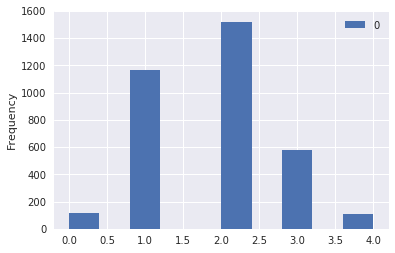

In [3]:
y_train.plot(kind='hist')

In [4]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,...,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000
mean,0.494704,0.516275,0.509534,0.496653,0.498532,0.511081,0.489582,0.517844,0.501379,3.018297,...,0.506315,0.488314,0.508792,0.516152,0.491506,0.520646,0.513619,0.491074,0.487143,0.494403
std,1.344987,1.517720,1.944892,0.304816,0.288103,2.168340,1.745869,2.061410,0.455960,1.852894,...,1.823615,2.066324,2.231573,1.893010,0.663052,2.859162,1.640211,2.798898,0.759490,0.504922
min,-2.218093,-3.049841,-3.644502,-0.103472,0.000202,-6.311034,-3.112771,-3.924850,-0.567797,-1.517063,...,-4.907867,-5.978127,-6.095323,-3.873535,-1.449840,-5.190807,-4.348962,-6.242872,-1.650250,-0.805370
25%,-0.589310,-0.527882,-0.794563,0.237865,0.256838,-1.053578,-0.971074,-0.899595,0.181897,1.547495,...,-0.838412,-1.013490,-1.243487,-0.799890,0.035183,-1.551566,-0.692253,-1.507348,-0.081461,0.125037
50%,0.280815,0.596674,0.590149,0.497017,0.499785,0.473108,0.188150,0.578649,0.473828,2.731865,...,0.313560,0.275163,0.153479,0.545157,0.458264,0.357019,0.398614,0.095635,0.486496,0.457783
75%,1.416563,1.605525,1.862141,0.748879,0.749846,2.052051,1.711705,1.955837,0.778593,4.174919,...,1.785158,1.845097,2.052449,1.817626,0.903188,2.460358,1.660167,2.295469,1.039252,0.821512
max,4.744402,6.223512,8.318870,2.032806,0.999830,10.749737,6.003011,9.384850,3.594312,10.741713,...,6.356287,8.144853,8.391595,8.026214,3.419200,16.147908,8.265469,15.120344,3.239605,2.108298


In [5]:
 x_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
count,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,...,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000
mean,0.510528,0.490026,0.482277,0.506187,0.498081,0.486373,0.517432,0.491439,0.489777,3.043251,...,0.499900,0.524017,0.482916,0.478594,0.507929,0.478470,0.477087,0.506017,0.507248,0.505674
std,1.358122,1.552385,1.971012,0.303713,0.286979,2.268887,1.781170,2.088398,0.463235,1.899083,...,1.890823,2.092815,2.275297,1.924913,0.741653,2.844768,1.650048,2.892027,0.796203,0.507939
min,-1.955463,-3.028497,-3.635960,-0.072964,0.000071,-5.172199,-2.819717,-3.938980,-0.635150,-1.856706,...,-3.751087,-4.280036,-4.608529,-3.816419,-1.451155,-5.066616,-3.875628,-6.320384,-1.432893,-0.786137
25%,-0.625154,-0.590788,-0.891531,0.249451,0.252580,-1.131606,-0.957537,-0.994070,0.160658,1.471922,...,-0.884567,-1.055099,-1.281205,-0.905077,0.025177,-1.535533,-0.746545,-1.514193,-0.082791,0.141378
50%,0.288394,0.531141,0.551014,0.504986,0.500146,0.435753,0.247353,0.514059,0.466462,2.749847,...,0.314469,0.383986,0.094800,0.491902,0.480649,0.401905,0.369046,0.144737,0.506844,0.474373
75%,1.435157,1.615839,1.907915,0.761713,0.741685,2.049982,1.735638,1.944287,0.759888,4.304717,...,1.786642,1.901196,2.103036,1.839606,0.913976,2.417233,1.572980,2.397547,1.047549,0.818169
max,5.555919,5.955184,6.584223,1.841219,0.999688,26.188441,7.375343,7.454843,3.995325,10.310548,...,22.937762,7.827532,19.464380,7.194969,12.365040,10.338484,6.773294,14.599358,9.423405,2.891295


(array([ 0.08066829,  0.32725009,  0.2614568 ,  0.22999045,  0.17392313,
         0.12643754,  0.09439907,  0.02975001,  0.00629327,  0.00114423]),
 array([-1.95546299, -1.20432476, -0.45318653,  0.2979517 ,  1.04908993,
         1.80022817,  2.5513664 ,  3.30250463,  4.05364286,  4.80478109,
         5.55591932]),
 <a list of 10 Patch objects>)

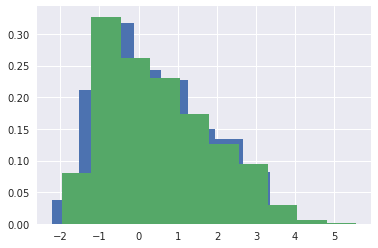

In [6]:
plt.hist(x_train[0], normed=True)
plt.hist(x_test[0], normed=True)

(array([ 0.06075094,  0.1296339 ,  0.13633086,  0.23774188,  0.23774188,
         0.1846446 ,  0.08801711,  0.031093  ,  0.00669695,  0.00047835]),
 array([-3.02849664, -2.13012855, -1.23176046, -0.33339237,  0.56497572,
         1.46334381,  2.3617119 ,  3.26007999,  4.15844808,  5.05681617,
         5.95518426]),
 <a list of 10 Patch objects>)

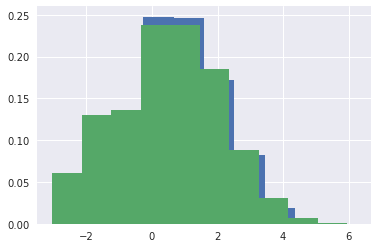

In [7]:
plt.hist(x_train[1], normed=True)
plt.hist(x_test[1], normed=True)

(array([  9.96778355e-02,   2.53381058e-01,   1.08648841e-01,
          1.59484537e-03,   3.98711342e-04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.99355671e-04]),
 array([ -2.81067085,  -0.65503686,   1.50059712,   3.65623111,
          5.8118651 ,   7.96749909,  10.12313307,  12.27876706,
         14.43440105,  16.59003503,  18.74566902]),
 <a list of 10 Patch objects>)

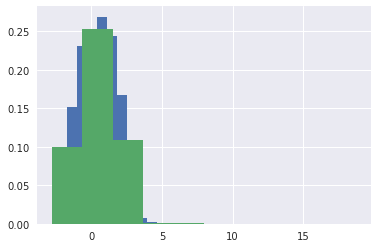

In [8]:
plt.hist(x_train[114], normed=True)
plt.hist(x_test[114], normed=True)

(array([ 0.08096876,  0.        ,  0.83404987,  0.        ,  0.        ,
         1.08985383,  0.        ,  0.4163084 ,  0.        ,  0.07881915]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

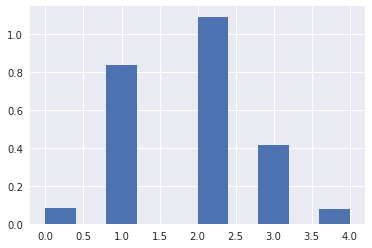

In [9]:
plt.hist(y_train[0], normed=True)

In [10]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.30)

In [139]:
cls_xgb = xgb.XGBClassifier(max_depth=6, 
                            learning_rate=0.05, 
                            reg_lambda=0.01, 
                            reg_alpha=0.01, 
                            objective="multi:softmax",
                            nthread=6)
cls_xgb.fit(x_train, y_train)

print('train: ', accuracy_score(y_train, cls_xgb.predict(x_train)))
print('valid: ', accuracy_score(y_valid, cls_xgb.predict(x_valid)))

train:  0.989762489762
valid:  0.547277936963


In [135]:
cls_sgd = SGDClassifier(loss="modified_huber",
                        penalty="l2",
                        alpha=0.1,
                        shuffle=True,
                        class_weight=dict(y_train[0].value_counts(normalize=True)),
                        learning_rate="invscaling",
                        eta0=0.1,
                        n_iter=1)
cls_sgd.fit(x_train, y_train)

print('train: ', accuracy_score(y_train, cls_sgd.predict(x_train)))
print('valid: ', accuracy_score(y_valid, cls_sgd.predict(x_valid)))

train:  0.406224406224
valid:  0.404011461318


In [112]:
x_train_new = (x_train + 1000).astype(np.float128)
x_valid_new = (x_valid + 1000).astype(np.float128)
x_test_new = (x_test + 1000).astype(np.float128)

In [113]:
cls_mnb = MultinomialNB()
cls_mnb.fit(x_train_new, y_train)

print('train: ', accuracy_score(y_train, cls_mnb.predict(x_train_new)))
print('valid: ', accuracy_score(y_valid, cls_mnb.predict(x_valid_new)))

train:  0.454135954136
valid:  0.457497612225


In [140]:
x_xgb_train = np.array([cls_sgd.predict(x_train), 
                        cls_mnb.predict(x_train),
                        cls_xgb.predict(x_train)]).reshape(-1, 3)
x_xgb_valid = np.array([cls_sgd.predict(x_valid), 
                        cls_mnb.predict(x_valid),
                        cls_xgb.predict(x_valid)]).reshape(-1, 3)
x_xgb_test = np.array([cls_sgd.predict(x_test), 
                       cls_mnb.predict(x_test),
                       cls_xgb.predict(x_test)]).reshape(-1, 3)

In [144]:
cls_xgb = xgb.XGBClassifier(max_depth=5, 
                            learning_rate=0.01, 
                            reg_lambda=0.01, 
                            reg_alpha=0.01, 
                            objective="multi:softmax",
                            nthread=6)
cls_xgb.fit(x_xgb_train, y_train)

print('train: ', accuracy_score(y_train, cls_xgb.predict(x_xgb_train)))
print('valid: ', accuracy_score(y_valid, cls_xgb.predict(x_xgb_valid)))

train:  0.446764946765
valid:  0.433619866285
